In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

from data_loading import load_runs

In [3]:
# RUN = ["1","2","3","4b","4c","4d","5"]
RUN = ["1", "2", "3"]
signal_rundata, signal_mc_weights, signal_data_pot = load_runs(
    RUN,
    data="bnb",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=True,
    use_new_signal_model=True,
)

get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
get_rundict: run_number= 2
Loading lee sample
get_rundict: run_number= 2
get_rundict: run_number= 1
get_rundict: run_number= 2
get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
Loading lee sample
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3


In [36]:
from microfit.histogram import Binning, MultiChannelBinning

binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")  # reproduce technote

binning_npl = Binning.from_config(*binning_def)
binning_npl.set_selection(preselection="NP", selection="NPBDT")
binning_npl.label = "NPBDT"

binning_zpl = Binning.from_config(*binning_def)
binning_zpl.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl.label = "ZPBDT"

binning_def = ("shr_energy_tot_cali", 14, (0.1, 1.55), r"Reconstructed Shower Energy [GeV]")  # reproduce technote

binning_npl_shr_e = Binning.from_config(*binning_def)
binning_npl_shr_e.set_selection(preselection="NP", selection="NPBDT")
binning_npl_shr_e.label = "NPBDT_SHR_E"

binning_zpl_shr_e = Binning.from_config(*binning_def)
binning_zpl_shr_e.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl_shr_e.label = "ZPBDT_SHR_E"

binning_def = ("shr_theta", 14, (0, 3.14), r"Reconstructed Shower $\theta$")  # reproduce technote

binning_npl_reco_pz = Binning.from_config(*binning_def)
binning_npl_reco_pz.set_selection(preselection="NP", selection="NPBDT")
binning_npl_reco_pz.label = "NPBDT_SHR_PZ"

binning_zpl_reco_pz = Binning.from_config(*binning_def)
binning_zpl_reco_pz.set_selection(preselection="ZP", selection="ZPBDT")
binning_zpl_reco_pz.label = "ZPBDT_SHR_PZ"

# shr_e_binning_def = ("shr_energy_cali", 16, (0, 4), "Reconstructed Electron Energy [GeV] \n (shr_energy_cali)")
# shr_e_binning = Binning.from_config(*shr_e_binning_def)
# shr_e_binning.set_selection(preselection="NP", selection="NPBDT")
# shr_e_binning.label = "NPBDT_SHR_E"

binning_def_true_elec_e = ("elec_e", 26, (0.01, 2.55), r"True Electron Energy [GeV]")
binning_true_elec_e = Binning.from_config(*binning_def_true_elec_e)
binning_true_elec_e.set_selection(preselection="NP", selection="NPBDT")
binning_true_elec_e.label = "NPBDT_TRUE_ELEC_E"
binning_true_elec_e.selection_tex = r"True $E_e$"
binning_true_elec_e.selection_tex_short = r"True $E_e$"

binning_def_true_elec_e_pz = ("elec_pz", 26, (-1.0, 1.0), r"True Electron $\cos(\theta)$")
binning_true_elec_e_pz = Binning.from_config(*binning_def_true_elec_e_pz)
binning_true_elec_e_pz.set_selection(preselection="NP", selection="NPBDT")
binning_true_elec_e_pz.label = "NPBDT_TRUE_ELEC_PZ"
binning_true_elec_e_pz.selection_tex = r"True $\cos(\theta_e)$"
binning_true_elec_e_pz.selection_tex_short = r"True $\cos(\theta_e)$"

truth_binning = MultiChannelBinning([binning_true_elec_e, binning_true_elec_e_pz])
signal_binning = MultiChannelBinning([binning_npl, binning_zpl, binning_npl_reco_pz, binning_zpl_reco_pz, binning_npl_shr_e, binning_zpl_shr_e])

In [37]:
from microfit.parameters import Parameter, ParameterSet
from microfit.signal_generators import SignalOverBackgroundGenerator
from microfit.histogram import RunHistGenerator

signal_parameters = ParameterSet(
    [
        Parameter("signal_strength", 1.0, bounds=(0, 10)),
    ]
)

signal_generator = RunHistGenerator(
    signal_rundata,
    signal_binning,
    data_pot=signal_data_pot,
    mc_hist_generator_cls=SignalOverBackgroundGenerator,
    parameters=signal_parameters,
)

In [38]:
signal_generator.channels

['NPBDT',
 'ZPBDT',
 'NPBDT_SHR_PZ',
 'ZPBDT_SHR_PZ',
 'NPBDT_SHR_E',
 'ZPBDT_SHR_E']

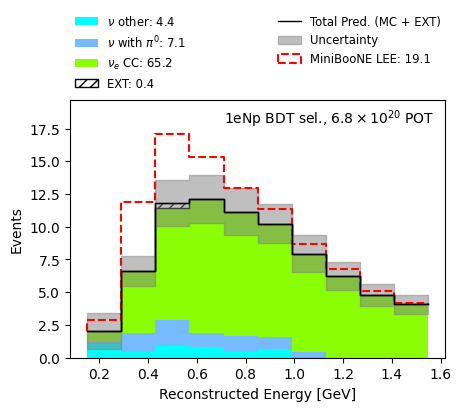

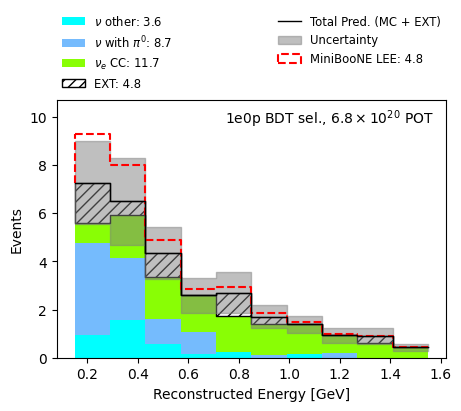

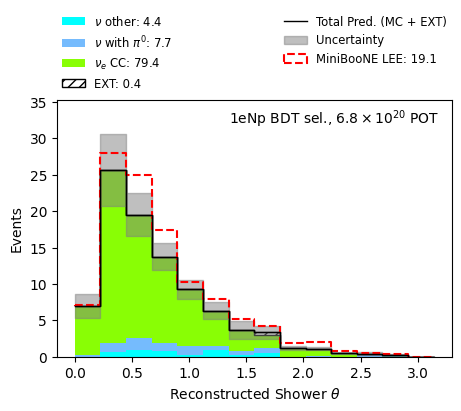

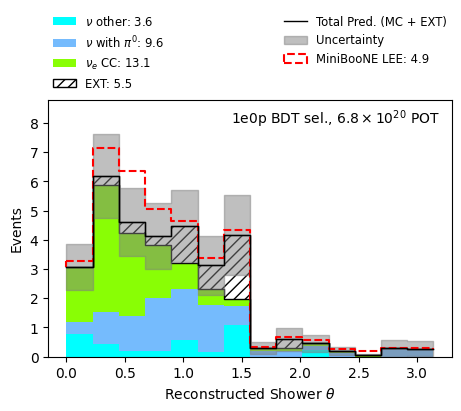

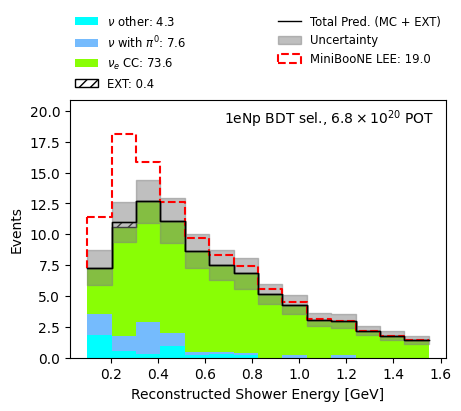

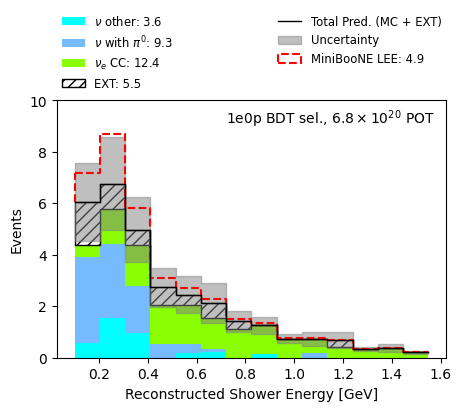

In [39]:
from matplotlib import pyplot as plt
from microfit.run_plotter import RunHistPlotter

for channel in signal_generator.channels:
    fig, ax = plt.subplots(figsize=(4.5, 4), constrained_layout=True)
    ax = RunHistPlotter(signal_generator).plot(
        category_column="paper_category", 
        include_multisim_errors=True,
        show_data_mc_ratio=False,
        add_ext_error_floor=False,
        ax=ax,
        channel=channel,
        legend_cols=2
    )
    fig.savefig(f"new_signal_ana_plots/{channel}.pdf")